Сделайте summary нижеуказанного текста, используя библиотеки для NLP: nltk и SpaCy

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Load the dataset
file_path = 'internet_service_churn.csv'
data = pd.read_csv(file_path)

data.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [9]:
data.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


Аналіз Даних (EDA)

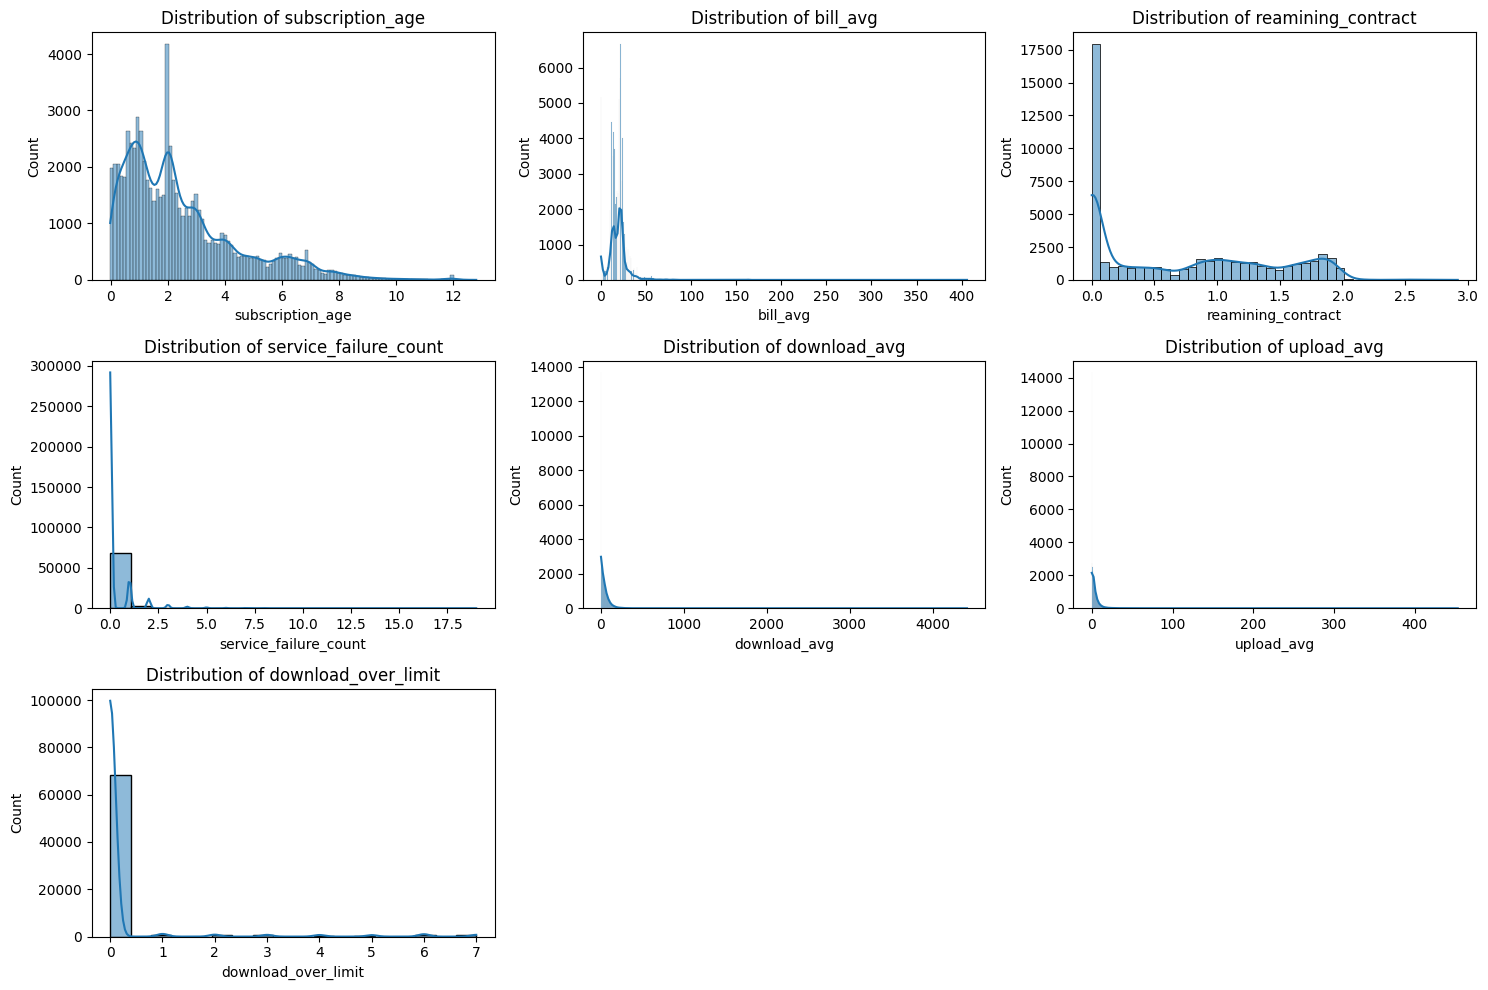

In [10]:
# Вивчення розподілу числових змінних
numerical_columns = ['subscription_age', 'bill_avg', 'reamining_contract', 'service_failure_count',
                     'download_avg', 'upload_avg', 'download_over_limit']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [11]:
# Перевірка кількості відсутніх значень у кожній колонці
missing_values = data.isnull().sum()
print(missing_values)

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64


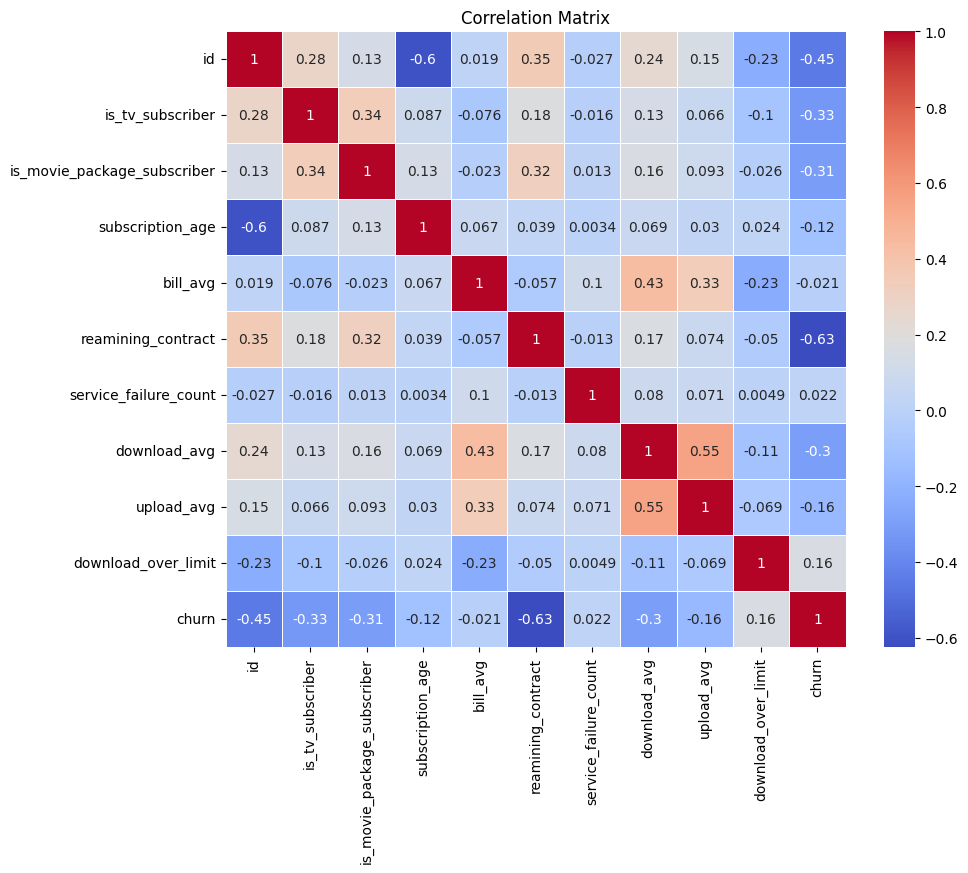

In [12]:
# Кореляційна матриця для числових ознак
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

4. Попередня Обробка Даних

In [14]:
# Обробка відсутніх значень
# Заповнимо відсутні значення медіаною для числових стовпців
data['reamining_contract'].fillna(data['reamining_contract'].median())
data['download_avg'].fillna(data['download_avg'].median())
data['upload_avg'].fillna(data['upload_avg'].median())

,upload_avg
0,2.3
1,0.0
2,0.9
3,0.0
4,0.0
...,...
72269,0.0
72270,0.0
72271,0.2
72272,0.0


In [15]:
# 2. Розділення на ознаки та ціль
X = data.drop(['id', 'churn'], axis=1)
y = data['churn']

In [16]:
# 3. Масштабування числових ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# 4. Поділ на тренувальні і тестові дані
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


5. Розробка Моделі

In [18]:
# 5. Навчання моделі SVM
model = SVC(kernel='rbf', C=1.0)
model.fit(X_train, y_train)

SVC()

In [19]:
# 6. Прогнозування
y_pred = model.predict(X_test)

In [20]:
# 7. Оцінка моделі
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy

0.8585066642069824

In [21]:
precision

0.8660966295865847

In [22]:
recall

0.8776076716016151

In [23]:
f1

0.8718141555945517

Інтеграція та Виведення Результатів

In [24]:
def predict_churn(new_client_data, model, scaler):
    """
    Прогнозування відтоку клієнта на основі нових даних.

    :param new_client_data: Словник із новими даними клієнта.
    :param model: Навчена модель SVM.
    :param scaler: Масштабувальник для нормалізації даних.
    :return: Результат прогнозу (Ймовірність відтоку: Висока/Низька).
    """
    # Перетворюємо словник у DataFrame
    new_client_df = pd.DataFrame([new_client_data])

    # Масштабування даних
    new_client_scaled = scaler.transform(new_client_df)

    # Прогноз
    prediction = model.predict(new_client_scaled)

    # Виведення результату
    if prediction == 1:
        return "Клієнт має високу ймовірність відтоку."
    else:
        return "Клієнт має низьку ймовірність відтоку."

In [25]:
new_client = {
    'is_tv_subscriber': 1,
    'is_movie_package_subscriber': 0,
    'subscription_age': 2,
    'bill_avg': 100.5,
    'reamining_contract': 0.5,
    'service_failure_count': 2,
    'download_avg': 50,
    'upload_avg': 20,
    'download_over_limit': 5
}

# Викликаємо функцію для прогнозування відтоку
result = predict_churn(new_client, model, scaler)
print(result)

Клієнт має високу ймовірність відтоку.


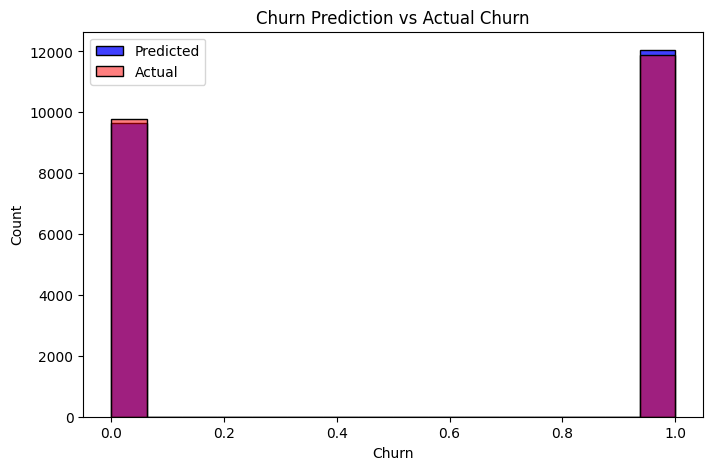

In [26]:
def visualize_churn_proba(model, X_test, y_test):
    """
    Візуалізація прогнозів моделі щодо відтоку клієнтів.

    :param model: Навчена модель SVM.
    :param X_test: Тестові дані.
    :param y_test: Реальні значення цільової змінної.
    """
    predictions = model.predict(X_test)

    # Візуалізація справжніх і передбачених значень
    plt.figure(figsize=(8, 5))
    sns.histplot(predictions, kde=False, color="blue", label='Predicted')
    sns.histplot(y_test, kde=False, color="red", label='Actual', alpha=0.5)
    plt.legend()
    plt.title('Churn Prediction vs Actual Churn')
    plt.xlabel('Churn')
    plt.ylabel('Count')
    plt.show()

# Викликаємо функцію для візуалізації результатів
visualize_churn_proba(model, X_test, y_test)